<a href="https://colab.research.google.com/github/HusseinAndia/Telco_Customer_Churn/blob/master/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Get Data from kaggle and grab it from my drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
! kaggle datasets download -d blastchar/telco-customer-churn

  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 11.4MB/s]


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


# **1. Data Manipulation** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("/content/drive/My Drive/Kaggle/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#Convert "TotalCharges" to numeric and drop nan values
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
print('Missing Values:',df["TotalCharges"].isnull().sum())

Missing Values: 11


* These 11 Missing Values maybe saved as string or forgotten to add due to human error. 

In [5]:
#replace 'No internet service' to No for the following columns
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in cols:
    df[i] = df[i].replace({'No internet service' : 'No'})
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service' : 'No'})
df.dropna(inplace=True)
print ("Unique values :  \n",df.nunique())

Unique values :  
 customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64


# **2. Exploratory Data Analysis (EDA)** 

In [6]:
# Separate customers to churn and no_churn to simplify the data analysis.
churn = df[df["Churn"] == 'Yes']
no_churn = df[df["Churn"] == 'No']

churn_MonthlyCharge = churn.groupby('PaymentMethod')['MonthlyCharges'].sum().round(2)
no_churn_MonthlyCharge = no_churn.groupby('PaymentMethod')['MonthlyCharges'].sum().round(2)

print(no_churn_MonthlyCharge,'\n',churn_MonthlyCharge)

PaymentMethod
Bank transfer (automatic)    83539.10
Credit card (automatic)      83229.20
Electronic check             96056.25
Mailed check                 53705.60
Name: MonthlyCharges, dtype: float64 
 PaymentMethod
Bank transfer (automatic)    20091.90
Credit card (automatic)      17946.60
Electronic check             84288.75
Mailed check                 16803.60
Name: MonthlyCharges, dtype: float64


In [7]:
PaymentMethod = churn_MonthlyCharge.index.to_list()
churn_Monthly_value = churn_MonthlyCharge.values
no_churn_Monthly_value = no_churn_MonthlyCharge.values

#churn_Monthly_value
no_churn_MonthlyCharge.values[2]

96056.25

In [8]:
# fig = go.Figure()
ta = [['Payment Method', 'Churn Monthly Charge', 'No_Churn Monthly Charge'],
      [churn_MonthlyCharge.index[0],churn_MonthlyCharge.values[0],no_churn_MonthlyCharge.values[0]],
      [churn_MonthlyCharge.index[1],churn_MonthlyCharge.values[1],no_churn_MonthlyCharge.values[1]],
      [churn_MonthlyCharge.index[2],churn_MonthlyCharge.values[2],no_churn_MonthlyCharge.values[2]],
      [churn_MonthlyCharge.index[3],churn_MonthlyCharge.values[3],no_churn_MonthlyCharge.values[3]]]

# Initialize a figure with ff.create_table(table_data)
fig = ff.create_table(ta)

# Make traces for graph


trace1 = go.Bar(x=PaymentMethod, y=churn_Monthly_value, xaxis='x2', yaxis='y2',
                marker=dict(color='#0099ff'), name='Churn')
trace2 = go.Bar(x=PaymentMethod, y=no_churn_Monthly_value, xaxis='x2', yaxis='y2',
                marker=dict(color='#404040'), name='No_Churn')

# Add trace data to figure

fig.add_traces([trace1, trace2])


# initialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}

# Edit layout for subplots
fig.layout.yaxis.update({'domain': [0, .45]})
fig.layout.yaxis2.update({'domain': [.6, 1]})

# The graph's yaxis2 MUST BE anchored to the graph's xaxis2 and vice versa
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.xaxis2.update({'anchor': 'y2'})
fig.layout.yaxis2.update({'title': 'Monthly Charge'})

# Update the margins to add a title and see graph x-labels.
fig.layout.margin.update({'t':75, 'l':50})
fig.layout.update({'title': 'Monthly Charge related to every Payment Method'})

# Update the height because adding a graph vertically will interact with
# the plot height calculated for the table
fig.layout.update({'height':800})

# Plot!
fig.show()

* We noticed that most customers prefer Electronic check as their payment method.
* Between all churn customers Electronic check method also has a very high churn rate.

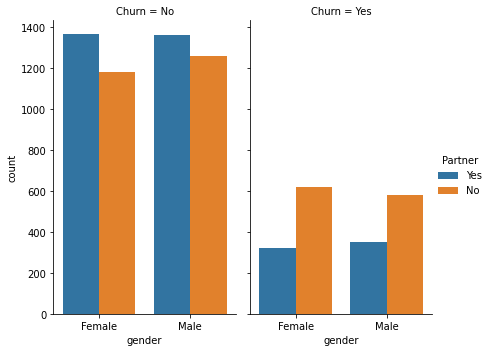

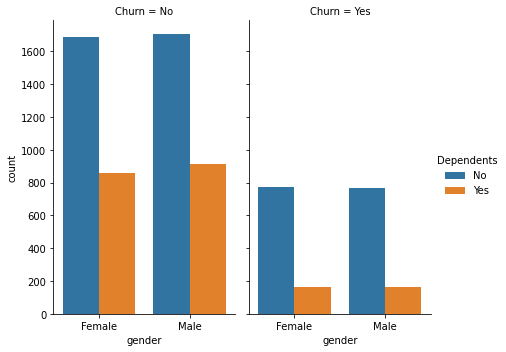

In [9]:
sns.catplot(x='gender', hue='Partner', col='Churn', aspect=.6, kind="count", data=df)
sns.catplot(x='gender', hue='Dependents', col='Churn', aspect=.6, kind="count", data=df)

* Customers without partners are more likely to churn (especially for females).
* Also customers without dependents are more likely to churn.

In [10]:
contr_month = df[df['Contract']=='Month-to-month']
contr_year = df[df['Contract']=='One year']
contr_years = df[df['Contract']=='Two year']


In [11]:
from plotly.subplots import make_subplots

fig1 = make_subplots(rows=1, cols=3, x_title="Tenure", y_title="Number of clients" 
                     , subplot_titles=('Month to Month Contract','One Year Contract','Two Year Contract'))

trace3 = go.Histogram(histfunc="count",x=contr_month['tenure'],y=contr_month['tenure'], name="Months'_contract_tenure")
trace4 = go.Histogram(histfunc="count",x=contr_year['tenure'],y=contr_year['tenure'], name="1 Year's_contract_tenure")
trace5 = go.Histogram(histfunc="count",x=contr_years['tenure'],y=contr_years['tenure'], name="2 Years'_contract_tenure")

fig1.add_trace(trace3, 1,1)
fig1.add_trace(trace4, 1,2)
fig1.add_trace(trace5, 1,3)


fig1.show()

* Customers with "Month to Month Contract" have a very high churn rate.
* While one and two year contracts' customers wait untill the end of their contracts and most of them renew contract more than once. 

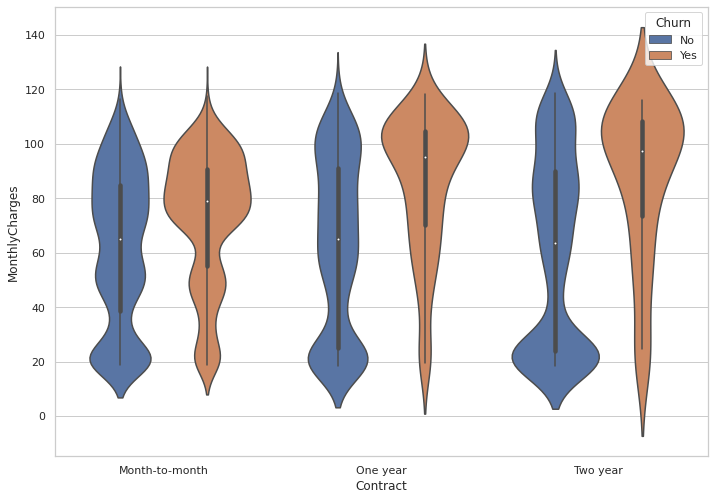

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)},style="whitegrid")
sns.violinplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df)

* In M to M contract customers who paid > 65 in monthly charges have higher churn rate. 
* While customers not churn in the three contracts type most of them who paid < 40 in monthly charges.

Text(0, 0.5, 'Probability Density')

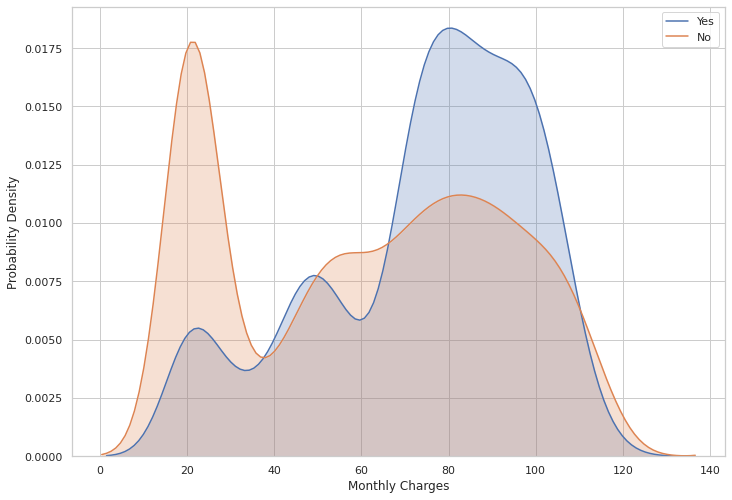

In [13]:
ax = sns.kdeplot(churn.MonthlyCharges, shade=True, label='Yes')
sns.kdeplot(no_churn.MonthlyCharges, ax=ax, shade=True, label='No')
plt.xlabel('Monthly Charges') 
plt.ylabel('Probability Density') 

In this plot is more obvious what we described previous in the violinplot.

* Probability for not churn customers is more higher in monthly charge = 20.

* Probability for churn customers is more higher for who paid monthly charge more than 70.



# **3. Data preprocessing**

In [14]:
# Drop columns don't need and convert columns with 2 values to binary.
cols_2 = df.nunique()[df.nunique() == 2].keys().tolist()
del cols_2[0:2]
data = df.drop('customerID', axis=1)
for i in cols_2:
    data[i] = data[i].replace({'Yes' : 1, 'No' : 0})
data['gender'] = data['gender'].replace({'Male' : 1, 'Female' : 0})

In [15]:
# Convert categorical columns to binary columns.
dum_col = ['InternetService','Contract','PaymentMethod']
dum_df = pd.get_dummies(data, columns=dum_col, prefix=["Internet", "contract", "method"])
data = pd.concat([data,dum_df.iloc[:,-10:]], axis=1, sort=False)
data.drop(dum_col, axis=1, inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gender                            7032 non-null   int64  
 1   SeniorCitizen                     7032 non-null   int64  
 2   Partner                           7032 non-null   int64  
 3   Dependents                        7032 non-null   int64  
 4   tenure                            7032 non-null   int64  
 5   PhoneService                      7032 non-null   int64  
 6   MultipleLines                     7032 non-null   int64  
 7   OnlineSecurity                    7032 non-null   int64  
 8   OnlineBackup                      7032 non-null   int64  
 9   DeviceProtection                  7032 non-null   int64  
 10  TechSupport                       7032 non-null   int64  
 11  StreamingTV                       7032 non-null   int64  
 12  Stream

## **Correlation Matrix**

***We will use correlation map and heat map to see the correlation between columns each other.***

In [17]:
# Make numerical columns to be in range (0,1)
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
data[['MonthlyCharges', 'TotalCharges']] = mms.fit_transform(data[['MonthlyCharges', 'TotalCharges']])

In [18]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Internet_DSL,Internet_Fiber optic,Internet_No,contract_Month-to-month,contract_One year,contract_Two year,method_Bank transfer (automatic),method_Credit card (automatic),method_Electronic check,method_Mailed check
gender,1.000,-0.002,-0.001,0.010,0.005,-0.008,-0.009,-0.016,-0.013,-0.001,-0.009,-0.007,-0.010,-0.012,-0.014,0.000,-0.009,0.008,-0.011,0.005,-0.003,0.008,-0.004,-0.016,0.002,0.001,0.013
SeniorCitizen,-0.002,1.000,0.017,-0.211,0.016,0.008,0.143,-0.039,0.067,0.060,-0.061,0.105,0.120,0.156,0.220,0.102,0.151,-0.108,0.255,-0.183,0.138,-0.046,-0.116,-0.016,-0.024,0.171,-0.153
Partner,-0.001,0.017,1.000,0.452,0.382,0.018,0.143,0.143,0.142,0.154,0.120,0.124,0.118,-0.014,0.098,0.319,-0.150,-0.001,0.001,-0.000,-0.280,0.083,0.247,0.111,0.082,-0.083,-0.097
Dependents,0.010,-0.211,0.452,1.000,0.163,-0.001,-0.024,0.081,0.024,0.014,0.063,-0.016,-0.038,-0.110,-0.112,0.065,-0.163,0.052,-0.164,0.138,-0.230,0.069,0.202,0.052,0.061,-0.149,0.056
tenure,0.005,0.016,0.382,0.163,1.000,0.008,0.332,0.328,0.361,0.362,0.325,0.280,0.285,0.005,0.247,0.826,-0.354,0.014,0.018,-0.038,-0.649,0.202,0.564,0.244,0.233,-0.210,-0.232
PhoneService,-0.008,0.008,0.018,-0.001,0.008,1.000,0.280,-0.092,-0.052,-0.070,-0.095,-0.021,-0.033,0.017,0.248,0.113,0.012,-0.452,0.290,0.172,-0.001,-0.003,0.004,0.008,-0.007,0.003,-0.004
MultipleLines,-0.009,0.143,0.143,-0.024,0.332,0.280,1.000,0.099,0.202,0.202,0.100,0.258,0.259,0.164,0.491,0.469,0.040,-0.200,0.366,-0.211,-0.089,-0.004,0.107,0.075,0.060,0.084,-0.228
OnlineSecurity,-0.016,-0.039,0.143,0.081,0.328,-0.092,0.099,1.000,0.283,0.275,0.354,0.176,0.187,-0.004,0.296,0.413,-0.171,0.320,-0.031,-0.333,-0.247,0.101,0.192,0.094,0.115,-0.112,-0.080
OnlineBackup,-0.013,0.067,0.142,0.024,0.361,-0.052,0.202,0.283,1.000,0.303,0.294,0.282,0.275,0.127,0.442,0.510,-0.082,0.157,0.166,-0.381,-0.164,0.084,0.111,0.087,0.090,-0.000,-0.174
DeviceProtection,-0.001,0.060,0.154,0.014,0.362,-0.070,0.202,0.275,0.303,1.000,0.333,0.390,0.402,0.104,0.483,0.523,-0.066,0.145,0.176,-0.380,-0.226,0.103,0.165,0.083,0.111,-0.003,-0.187


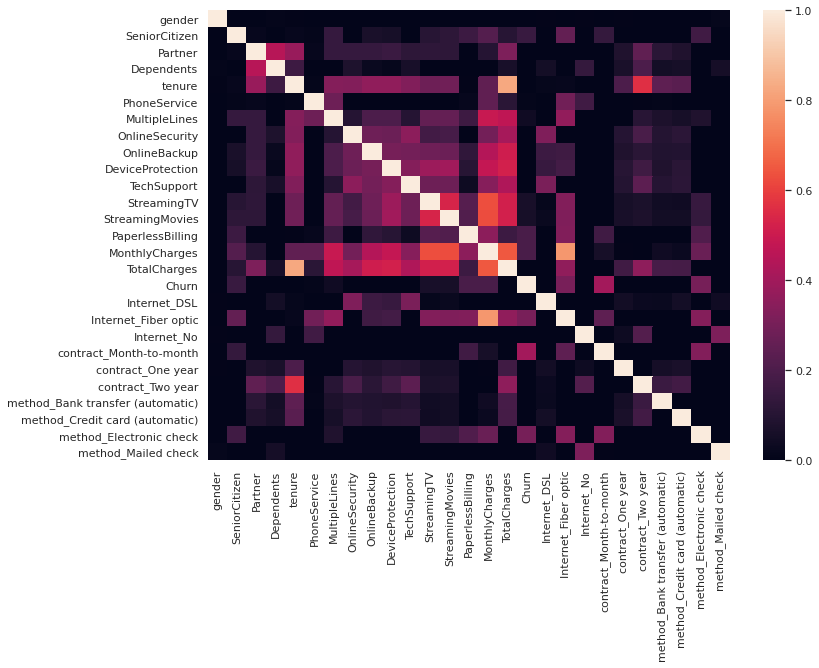

In [19]:
sns.heatmap(corr, vmin=0, vmax=1)

# **Models Building**

## **Synthetic Minority Over-sampling Technique for Nominal and Continuous (SMOTE-NC)**

In [20]:
# Convert columns to categorical to use SMOTENC 
data_1 = data.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1)
cat_cols = data_1.columns
data[cat_cols] = data[cat_cols].astype(str)

In [21]:
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

X = data.drop('Churn', axis=1)
Y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=11)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4922, 26) (2110, 26) (4922,) (2110,)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [22]:
categorial_col = list(set(data.select_dtypes(object).columns) - set(['Churn']))
cat_col_index = [X_train.columns.get_loc(c) for c in categorial_col if c in X_train]

In [23]:
smote_nc = SMOTENC(categorical_features=cat_col_index, sampling_strategy='minority')
x_res,y_res = smote_nc.fit_resample(X_train,y_train)

print(x_res.shape, y_res.shape)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



(7252, 26) (7252,)


In [24]:
x_res = pd.DataFrame(x_res, columns=X.columns)

x_res = x_res.apply(pd.to_numeric)
y_res = pd.to_numeric(y_res)

X_train[categorial_col] = X_train[categorial_col].apply(pd.to_numeric)
X_test[categorial_col] = X_test[categorial_col].apply(pd.to_numeric)

y_train = pd.to_numeric(y_train)
y_test = pd.to_numeric(y_test)


### **Models Performance**

In [25]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def result(model_name,model,x_train,x_test,y_train,y_test):
    global f1_score
    model.fit(x_train,y_train)
    pred  = model.predict(x_test)
    accuracy   = accuracy_score(y_test,pred)
    recall     = recall_score(y_test,pred, average="binary", pos_label=1)
    precision  = precision_score(y_test,pred, average="binary", pos_label=1)
    f1         = f1_score(y_test,pred, average="binary", pos_label=1) 
    
    scores = pd.DataFrame({"Model"    : [model_name],
                          "Accuracy"  : [accuracy],
                          "Recall"    : [recall],
                          "Precision" : [precision],
                          "f1_score"  : [f1]})

    return scores

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


xgb = XGBClassifier(learning_rate=0.1, n_estimators=500, n_jobs=-1)
dt = DecisionTreeClassifier(max_depth = 3)
log = LogisticRegression(C=0.1, max_iter=500, n_jobs=-1)
rf = RandomForestClassifier(n_estimators=1000, n_jobs = -1)

xgb_model = result("XGB Classifier", xgb, X_train, X_test, y_train, y_test)
xgb_model_SMOTENC = result("XGB Classifier(SMOTENC)", xgb, x_res, X_test, y_res, y_test)

dt_model = result("Decision Tree Classifier", dt, X_train, X_test, y_train, y_test)
dt_model_SMOTENC = result("Decision Tree Classifier(SMOTENC)", dt, x_res, X_test, y_res, y_test)

log_model = result("Logistic Regression", log, X_train, X_test, y_train, y_test)
log_model_SMOTENC = result("Logistic Regression(SMOTENC)", log, x_res, X_test, y_res, y_test)

rf_model = result("Random Forest Classifier", rf, X_train, X_test, y_train, y_test)
rf_model_SMOTENC = result("Random Forest Classifier(SMOTENC)", rf, x_res, X_test, y_res, y_test)


In [27]:
all_models = pd.concat([xgb_model, xgb_model_SMOTENC, dt_model, dt_model_SMOTENC, 
                       log_model, log_model_SMOTENC, rf_model, rf_model_SMOTENC],axis = 0).reset_index()
all_models.drop("index",axis=1, inplace=True)
all_models

,Model,Accuracy,Recall,Precision,f1_score
0,XGB Classifier,0.778673,0.502618,0.612766,0.552253
1,XGB Classifier(SMOTENC),0.767299,0.650960,0.561747,0.603072
2,Decision Tree Classifier,0.782464,0.364747,0.687500,0.476625
3,Decision Tree Classifier(SMOTENC),0.748815,0.717277,0.527599,0.607988
4,Logistic Regression,0.790521,0.513089,0.643326,0.570874
5,Logistic Regression(SMOTENC),0.773460,0.717277,0.565337,0.632308
6,Random Forest Classifier,0.773460,0.469459,0.607223,0.529528
7,Random Forest Classifier(SMOTENC),0.771564,0.565445,0.581688,0.573451
